# Lets Grow More || Aditi Agarwal

# Task 1 : IRIS FLOWER CLASSIFICATION USING ML

# Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Dataset 

In [2]:
data=pd.read_csv("iris.data",names="Petal_length Petal_Width Sepal_Length Sepal_Width Class".split())

In [3]:
data

,Petal_length,Petal_Width,Sepal_Length,Sepal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# EDA

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal_length  150 non-null    float64
 1   Petal_Width   150 non-null    float64
 2   Sepal_Length  150 non-null    float64
 3   Sepal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,Petal_length,Petal_Width,Sepal_Length,Sepal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data["Class"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

In [7]:
data.isnull().sum()

Petal_length    0
Petal_Width     0
Sepal_Length    0
Sepal_Width     0
Class           0
dtype: int64

# Data Visualization

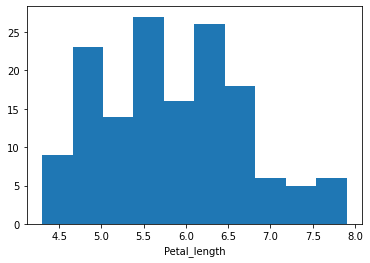

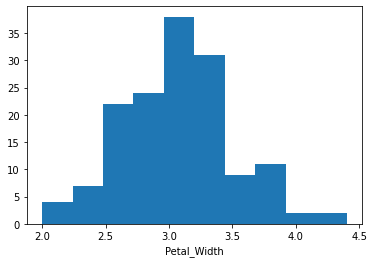

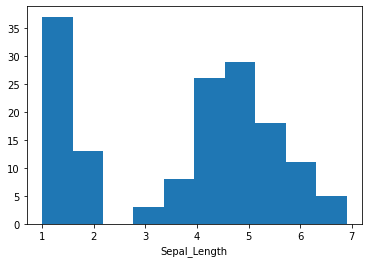

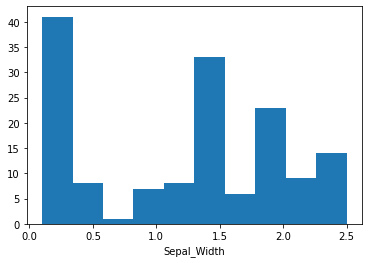

In [8]:
for i in data.columns[:-1]:
    plt.hist(data[i])
    plt.xlabel(i)
    plt.show()

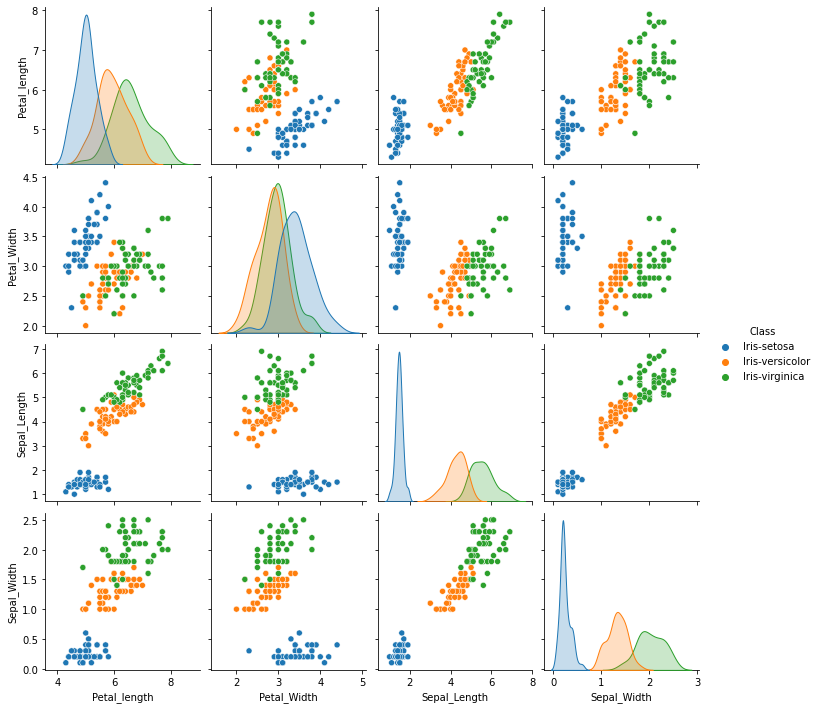

In [9]:
sns.pairplot(data,hue="Class")
plt.show()

# Correlation matrix

In [10]:
corr=data.corr()

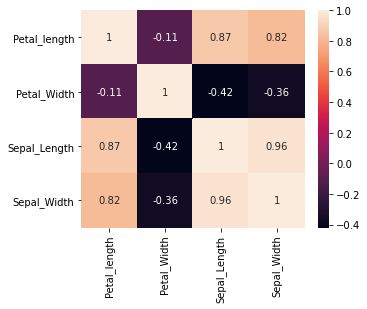

In [11]:
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)
plt.show()

# Model Training

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
data['Class']=le.fit_transform(data["Class"])

In [15]:
data.head()

,Petal_length,Petal_Width,Sepal_Length,Sepal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=data.drop(columns=["Class"])
y=data["Class"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)


In [17]:
model=LinearRegression()

In [18]:
model.fit(xtrain,ytrain)

LinearRegression()

In [19]:
model.coef_

array([-0.18145404, -0.00060379,  0.31145508,  0.48957442])

In [20]:
model.score(xtest,ytest)*100

91.89707585088199

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)*100

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100.0

In [22]:
ypred=model.predict(xtest)
ypred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(np.sqrt(mean_squared_error(ytest,ypred)))
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred)*100)

0.0
0.0
100.0


# THANK YOU